### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

#### 1.1


<div>
<img src="attachment:6acc694b-039e-4db1-af9f-12db1750e82c.png" width="400"/>
</div>

#### 1.2

This models the data (kind of) effectively. From run to run, the model quality is noticebly improved. Below is run 2 then run 3.


<div>
<img src="attachment:2338986e-65a7-43f5-afeb-372005721201.png" width="300"/>
</div>


<div>
<img src="attachment:f89be4f8-4f60-40d5-94d5-a3bc5e10656b.png" width="300"/>
</div>

#### 1.3

Based on the test loss, increasing the number of neurons from 2 to 3 improves how efficiently the data is modelled. From run to run, the model quality is slightly improved. Runs 2 and 3 are below. 

<div>
<img src="attachment:63df11f5-da77-4b45-8224-4f9186467c8c.png" width="300"/>
</div>

<div>
<img src="attachment:924658c0-36b8-4b9b-a335-3e962676dc77.png" width="300"/>
</div>

#### 1.4

To give a test loss of 0.177 or lower, the smallest number of neurons is 6 total, 3 in each layer and the smallest number of layers is 2.

<div>
<img src="attachment:e88b953e-f384-4700-9d35-6f02bd36dd32.png" width="300"/>
</div>

#### 1.5

For this architecture, the model converged more quickly, but had a worse fit (based on test loss) than the architecture I used for 1.4

<div>
<img src="attachment:10f05ce0-b6ab-4cdd-817a-06bc12403319.png" width="300"/>
</div>

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

#### 2.1

In [4]:
data1 = np.load('/Users/toralcm/repos/astr_8070_s24/coursework/homeworks/hw_data/hw8_data_1.npy')

In [10]:
#reduce data volume
data = data1[0::10]

In [11]:
data

array([(19.46392, 18.89363, 18.85225, 18.8241 , 18.53599, 'QSO', 2.312959  , 1.925222e-04),
       (19.57886, 18.3459 , 17.77256, 17.38461, 17.19577, 'GALAXY', 0.07513239, 6.736610e-06),
       (18.32437, 18.17833, 18.02652, 17.87487, 17.66249, 'QSO', 2.076452  , 1.527402e-04),
       ...,
       (18.16093, 16.19251, 15.26509, 14.83778, 14.48919, 'GALAXY', 0.0705069 , 1.951192e-05),
       (18.87318, 16.98145, 16.12003, 15.70579, 15.38972, 'GALAXY', 0.04112273, 1.117603e-05),
       (18.84226, 17.23546, 16.46094, 16.05199, 15.73389, 'GALAXY', 0.04224834, 1.909350e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('specClass', '<U6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [3]:
#arrays of colors
u_g = data['u']-data['g']
g_r = data['g']-data['r']
r_i = data['r']-data['i']
i_z = data['i']-data['z']

#array of redshift and spectral class
redshift = data['redshift']
redshift_err = data['redshift_err']
spectral_class = data['specClass']

#### 2.2

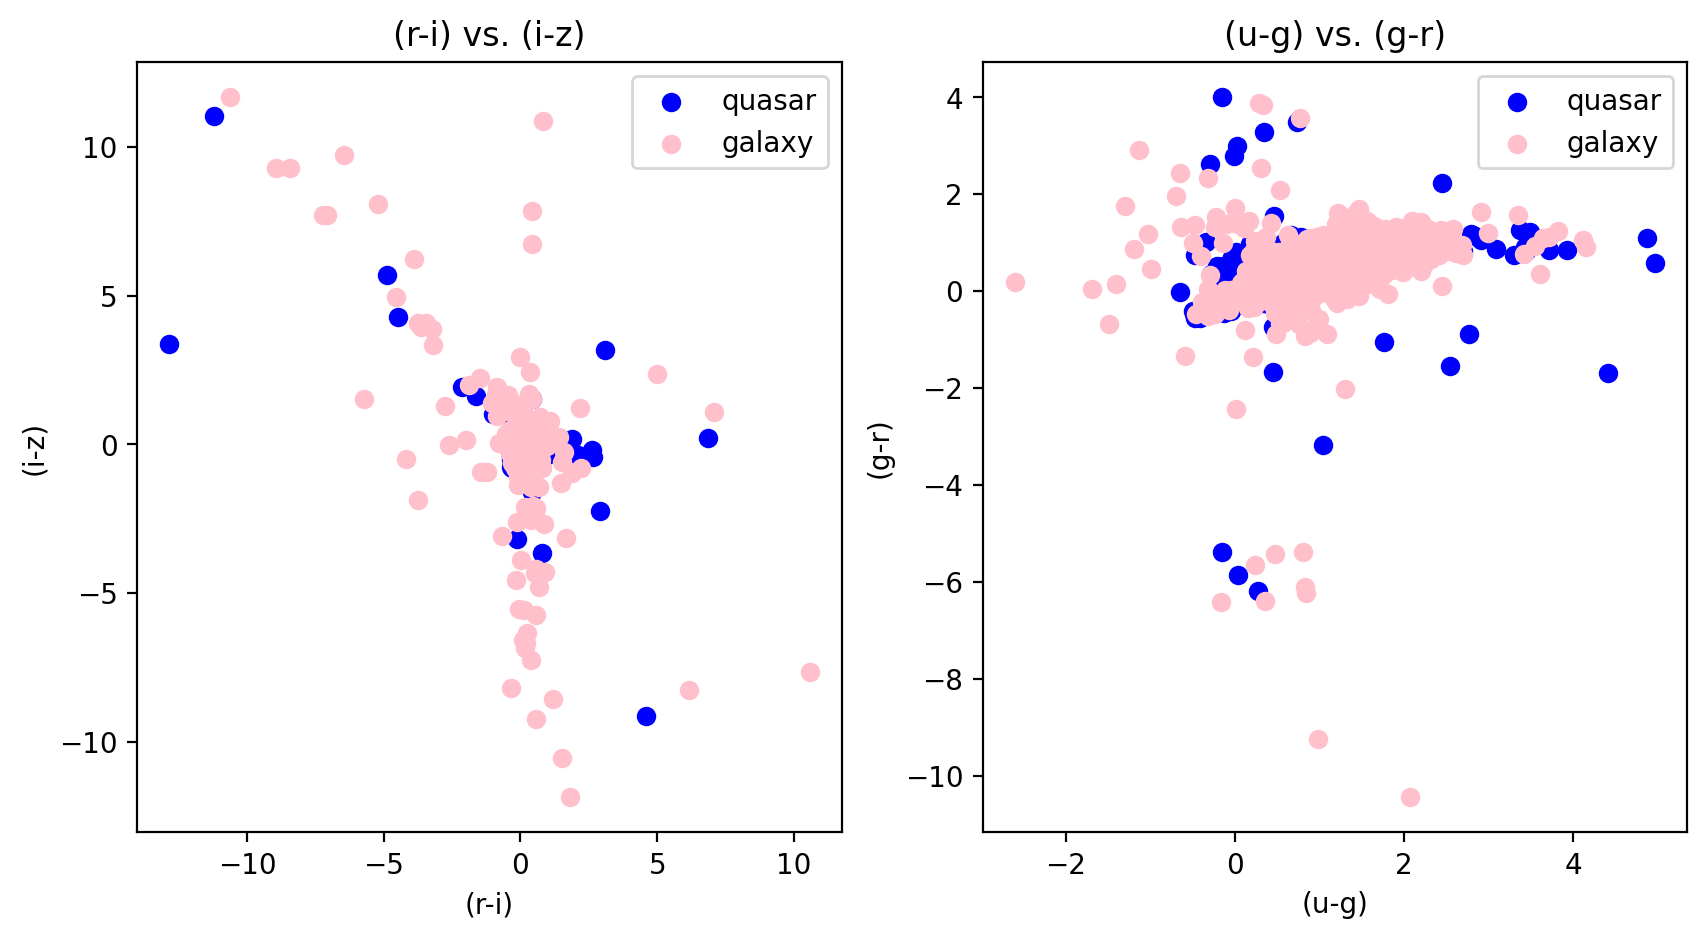

In [14]:
#scatter plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

quasars = np.where(spectral_class == 'QSO')[0]
galaxies = np.where(spectral_class == 'GALAXY')[0]

#(r_i) vs (i-z) plot

#quasar plot
ax[0].scatter(r_i[quasars], i_z[quasars], c='blue', label='quasar')

#galaxy plot
ax[0].scatter(r_i[galaxies], i_z[galaxies], c='pink', label='galaxy')

ax[0].set_xlabel('(r-i)')
ax[0].set_ylabel('(i-z)')
ax[0].set_title('(r-i) vs. (i-z)')
ax[0].legend()

#(u_g) vs (g_r) plot

#quasar plot
ax[1].scatter(u_g[quasars], g_r[quasars], c='blue', label='quasar')

#galaxy plot
ax[1].scatter(u_g[galaxies], g_r[galaxies], c='pink', label='galaxy')

ax[1].set_xlabel('(u-g)')
ax[1].set_ylabel('(g-r)')
ax[1].set_title('(u-g) vs. (g-r)')
ax[1].legend()




plt.show()

#### 2.3

In [15]:
X = np.column_stack((r_i, i_z))
X

array([[0.02815, 0.28811],
       [0.48183, 0.3653 ],
       [0.45719, 0.39585],
       ...,
       [0.10749, 0.26389],
       [0.05842, 0.01814],
       [0.16219, 0.10183]])

In [16]:
#make new array with labels 0 and 1
spectral_labels = []
labels = {'GALAXY': 0,'QSO': 1,}

for i in spectral_class:
    spectral_labels.append(labels[i])

spectral_labels

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


In [17]:
#train-test split 
from sklearn.model_selection import train_test_split
Xtest, Xtrain, spectral_labels_test, spectral_labels_train = train_test_split(X, spectral_labels, test_size=0.2, random_state=42)

#### 2.4

In [19]:
#from lecture 21
from sklearn import preprocessing

Xtrain_scaled = preprocessing.scale(Xtrain)
Xtest_scaled = preprocessing.scale(Xtest)
Xscaled = preprocessing.scale(X)

#### 2.5

In [21]:
#from lecture 21
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(activation='relu',solver='sgd',
                   hidden_layer_sizes=(5,2), 
                   random_state=42)

clf.fit(Xtrain_scaled, spectral_labels_train)

print([coef.shape for coef in clf.coefs_])

[(2, 5), (5, 2), (2, 1)]


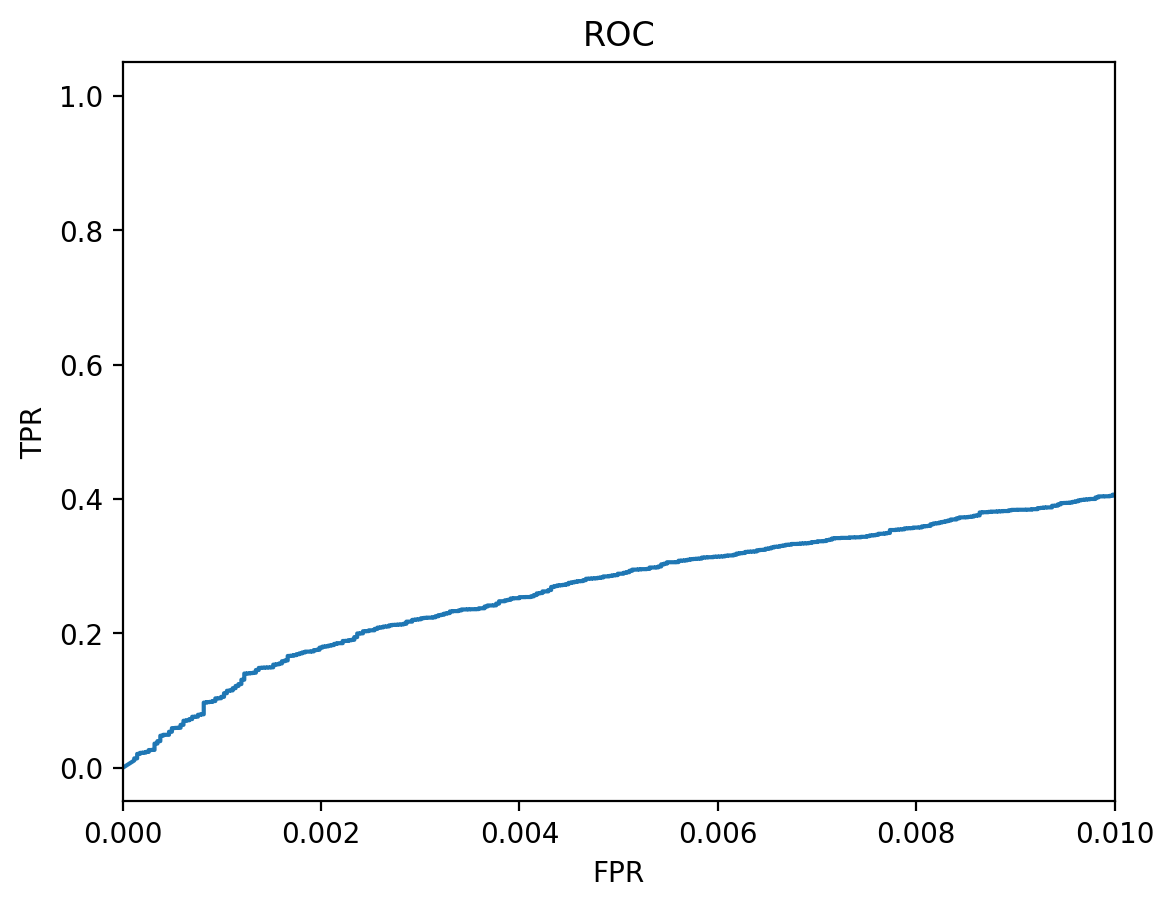

In [23]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

spec_pred = clf.predict(Xtest_scaled)

fpr, tpr, thresh = roc_curve(spectral_labels_test, spec_pred)
precision, recall, thresh2 = precision_recall_curve(spectral_labels_test, spec_pred)

# add (0, 0) as first point
fpr = np.concatenate([[0], fpr])
tpr = np.concatenate([[0], tpr])

# Here we add (1,0) 
precision = np.concatenate([[0], precision])
recall = np.concatenate([[1], recall])
thresh2 = np.concatenate([[0], thresh2])

plt.plot(fpr, tpr) 

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.xlim(0,0.01)

plt.show()


#### 2.6

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [10000]}

gridcv = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=5)

gridcv.fit(Xtrain, spectral_labels_train)

best_params = gridcv.best_params_
score = gridcv.best_score_


print("classification score:",score )
print("best parameters:",best_params)

classification score: 0.6189318148381521
best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 10000, 'random_state': 42, 'solver': 'lbfgs'}


#### 2.7

In [27]:
from sklearn.neural_network import MLPRegressor

clf2 = MLPRegressor(activation='tanh',solver='lbfgs',
                   hidden_layer_sizes=(5,5,5), 
                   random_state=42, max_iter=10000)

clf2.fit(Xtrain_scaled, spectral_labels_train)

print([coef.shape for coef in clf2.coefs_])

[(2, 5), (5, 5), (5, 5), (5, 1)]


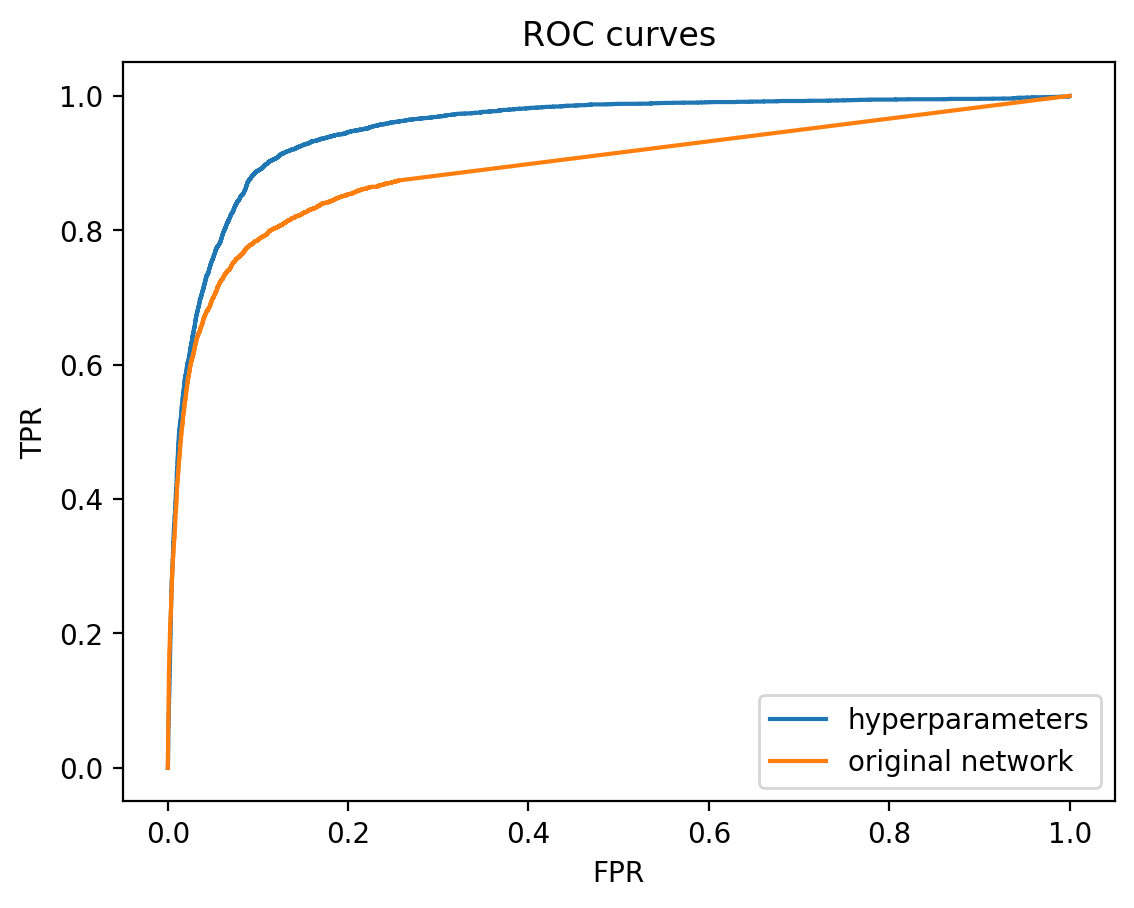

In [29]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


#new network
spec_pred2 = clf2.predict(Xtest_scaled)

fpr2, tpr2, thresh2 = roc_curve(spectral_labels_test, spec_pred2)
precision2, recall2, thresh22 = precision_recall_curve(spectral_labels_test, spec_pred2)

# add (0, 0) as first point
fpr2 = np.concatenate([[0], fpr2])
tpr2 = np.concatenate([[0], tpr2])

# Here we add (1,0) 
precision2 = np.concatenate([[0], precision2])
recall2 = np.concatenate([[1], recall2])
thresh22 = np.concatenate([[0], thresh22])

plt.plot(fpr2, tpr2, label='hyperparameters') 

#original network
plt.plot(fpr, tpr, label='original network')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curves')
plt.legend()

plt.show()